(2, 60) (1, 60) [[1.02397993 1.02376768 1.02355543 ... 0.9769503  0.97673805 0.9765258 ]
 [0.99124279 0.9913894  0.99153601 ... 1.00984607 1.00999267 1.01013928]
 [0.98477727 0.98484294 0.98490862 ... 1.01320919 1.01327486 1.01334053]] [[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]] [[ 1.02397993  0.99124279  0.98477727]
 [-0.00700422  0.004838    0.00216715]
 [-0.00881383  0.00146083  0.00735394]]


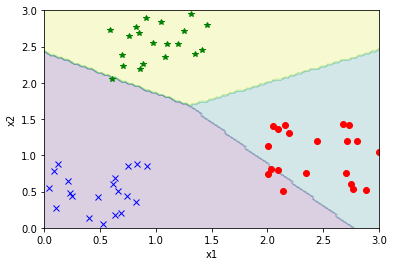

In [49]:
# import auto diff
from autograd import grad
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd.misc.flatten import flatten_func
from autograd import value_and_grad
# compute C linear combinations, one per classifier
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T
# multiclass perceptron
lam = 10**-21 # reg param
def multiclass_perceptron(x,y,w):
# pre-compute predictions on all points
    all_evals = model(x,w)
    # compute max across data points
    a = np.max(all_evals,axis = 0)
    # compute cost in compact form using numpy broadcasting
    b = all_evals[y.astype(int),np.arange(np.size(y))]
    cost = np.sum(a-b)
    # add reg
    cost = cost + lam*np.linalg.norm(w[1:,:],'fro')**2
    # return average
    return cost/float(np.size(y))
# gradient descent function
def gradient_descent(g, step, max_its, w):
    # flatten g
    g_flat, unflatten_func, w_flat = flatten_func(g,w)
    # compute gradient
    gradient = grad(g_flat)
    # gradient descent loop
    weight_history = [w_flat] # weight history container
    cost_history = [g_flat(w_flat)] # cost history container
    for k in range(max_its):
        # eval gradient
        grad_eval = gradient(w_flat)
        grad_eval_norm = grad_eval / np.linalg.norm(grad_eval)
        # take grad descent step
        if step == 'd':
            alpha = 1/(k+1)
        else:
            alpha = step
        w_flat = w_flat - alpha*grad_eval_norm
        # record weight and cost
        weight_history.append(w_flat)
        cost_history.append(g_flat(w_flat))
    return weight_history, cost_history, unflatten_func
Pc = 20 # points per class
C = 3 # n. classes
iter = 500
N = 2

x1 = np.random.rand(2,Pc)+[[0],[0]]
x2 = np.random.rand(2,Pc)+[[2],[0.5]]
x3 = np.random.rand(2,Pc)+[[0.5],[2]]
x = np.c_[x1,x2,x3]
y = np.c_[0*np.ones((1,Pc)), np.ones((1,Pc)), 2*np.ones((1,Pc))]
plt.figure(1)
plt.plot(x1[0,0:].T,x1[1,0:].T,'xb')
plt.plot(x2[0,0:].T,x2[1,0:].T,'or')
plt.plot(x3[0,0:].T,x3[1,0:].T,'*g')
w = np.ones((N+1,C))
def c(t):
    c = multiclass_perceptron(x,y,t)
    return c
a, b, unflatten = gradient_descent(c,'d',iter,w)
# plt.figure(0)
# plt.plot(b)
wp = unflatten(a[iter])
xp1, xp2 = np.meshgrid(np.linspace(0,3,100),np.linspace(0,3,100))
# vectorize mesh grid
xp1_v = xp1.reshape(-1,1)
xp2_v = xp2.reshape(-1,1)
Xp_data = np.append(xp1_v,xp2_v,axis=1)
v=model(Xp_data.T,wp)
z=np.argmax(v,axis=0)
z=z.reshape(xp1.shape)
plt.figure(1)
plt.contourf(xp1,xp2,z,alpha=.2)
plt.xlabel('x1')
plt.ylabel('x2')

print(x.shape,y.shape,v,z,wp)


(925, 2) (925,) [[0.99382145 1.00102785 1.0051507 ]
 [1.10831881 1.08713163 0.80454956]
 [1.04217749 1.03149009 0.92633241]]


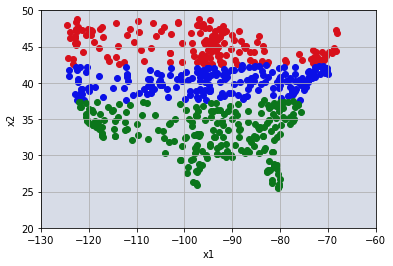

In [48]:
df = pd.read_csv("myENGR_518_Solar_energy_datasets.csv")
x=df.iloc[:, 4:6]
y=df.iloc[:,9]
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, train_size=600, random_state=None)
x1=x_train.iloc[:, 1]#  Longitude
x2=x_train.iloc[:, 0]#Latitude
colors=('r','b', 'g')
plt.scatter(x1[y==0],x2[y==0],c=colors[0])
plt.scatter(x1[y==1],x2[y==1],c=colors[1])
plt.scatter(x1[y==2],x2[y==2],c=colors[2]) 
plt.grid(1)
plt.ylabel('Latitude')
plt.xlabel('Longitude')
x_train=x_train.T
y_train=y_train.to_frame()
y_train=y_train.T
x_train=x_train.values
y_train=y_train.values
# print(x_train, y_train,type(y_train))



# import auto diff
from autograd import grad
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd.misc.flatten import flatten_func
from autograd import value_and_grad
# compute C linear combinations, one per classifier
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T
# multiclass perceptron
lam = 10**-21 # reg param
def multiclass_perceptron(x,y,w):
# pre-compute predictions on all points
    all_evals = model(x,w)
    # compute max across data points
    a = np.max(all_evals,axis = 0)
    # compute cost in compact form using numpy broadcasting
    b = all_evals[y.astype(int),np.arange(np.size(y))]
    cost = np.sum(a-b)
    # add reg
    cost = cost + lam*np.linalg.norm(w[1:,:],'fro')**2
    # return average
    return cost/float(np.size(y))
# gradient descent function
def gradient_descent(g, step, max_its, w):
    # flatten g
    g_flat, unflatten_func, w_flat = flatten_func(g,w)
    # compute gradient
    gradient = grad(g_flat)
    # gradient descent loop
    weight_history = [w_flat] # weight history container
    cost_history = [g_flat(w_flat)] # cost history container
    for k in range(max_its):
        # eval gradient
        grad_eval = gradient(w_flat)
        grad_eval_norm = grad_eval / np.linalg.norm(grad_eval)
        # take grad descent step
        if step == 'd':
            alpha = 1/(k+1)
        else:
            alpha = step
        w_flat = w_flat - alpha*grad_eval_norm
        # record weight and cost
        weight_history.append(w_flat)
        cost_history.append(g_flat(w_flat))
    return weight_history, cost_history, unflatten_func
Pc = 20 # points per class
C = 3 # n. classes
iter = 500
N = 2


def c(t):
    c = multiclass_perceptron(x_train,y_train,t)
    return c
a, b, unflatten = gradient_descent(c,'d',iter,w)
# plt.figure(0)
# plt.plot(b)
wp = unflatten(a[iter])
xp1, xp2 = np.meshgrid(np.linspace(-130,-60,100),np.linspace(20,50,100))
# vectorize mesh grid
xp1_v = xp1.reshape(-1,1)
xp2_v = xp2.reshape(-1,1)
Xp_data = np.append(xp1_v,xp2_v,axis=1)
v=model(Xp_data.T,wp)
z=np.argmax(v,axis=0)
z=z.reshape(xp1.shape)
plt.figure(1)
plt.contourf(xp1,xp2,z,alpha=.2)
plt.xlabel('x1')
plt.ylabel('x2')

print(x.shape,y.shape,wp)



ValueError: operands could not be broadcast together with shapes (3,) (20,) 

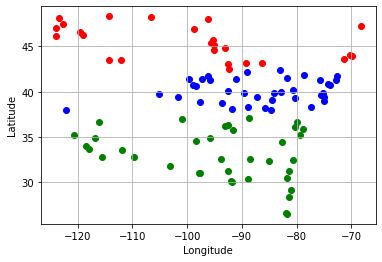

In [55]:
df = pd.read_csv("myENGR_518_Solar_energy_datasets.csv")
x=df.iloc[:, 4:6]
y=df.iloc[:,9]
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, train_size=100, random_state=None)
x1=x_train.iloc[:, 1]#  Longitude
x2=x_train.iloc[:, 0]#Latitude
colors=('r','b', 'g')
plt.scatter(x1[y==0],x2[y==0],c=colors[0])
plt.scatter(x1[y==1],x2[y==1],c=colors[1])
plt.scatter(x1[y==2],x2[y==2],c=colors[2]) 
plt.grid(1)
plt.ylabel('Latitude')
plt.xlabel('Longitude')
# x_train=x_train.T
# y_train=y_train.to_frame()
# y_train=y_train.T
x_train=x_train.values
y_train=y_train.values
# print(x_train.T.shape, y_train.T.shape,type(y_train))



import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import linear_model
iris = datasets.load_iris()
# get labels and features, use sepal this time

# train model1
log_regress = linear_model.LogisticRegression(penalty='l1',C=1,solver='liblinear')
log_regress.fit(x_train,y_train)
xx1, xx2 = np.meshgrid(np.linspace(-130,-60,100),np.linspace(20,50,100))
z=log_regress.predict(np.c_[xx1.ravel(), xx2.ravel()])
z=z.reshape(xx1.shape)
# plt.contourf(xx1,xx2,z,alpha=.2)
x1p=np.linspace(-130,-60,20)
x2p=-(log_regress.intercept_+log_regress.coef_[0][0]*x1p)/(log_regress.coef_[0][1]+.0001)
plt.plot(x1p,x2p)

(150, 2) (150,)


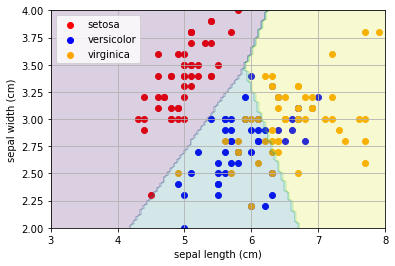

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import linear_model
iris = datasets.load_iris()
# get labels and features, use sepal this time
y = iris.target
x1 = iris.data[:,0]
x2 = iris.data[:,1]
x=np.array([x1,x2])
x=x.T
# scatter plot
colors=('r','b','orange')
for target in range(3):
    plt.scatter(x1[y==target],x2[y==target],c=colors[target])
plt.grid(1)
plt.legend(iris.target_names)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.xlim(3, 8)
plt.ylim(2, 4)
# train model1
log_regress = linear_model.LogisticRegression()
log_regress.fit(x,y)
xx1, xx2 = np.meshgrid(np.linspace(3,8,100),np.linspace(2,4,100))
z=log_regress.predict(np.c_[xx1.ravel(), xx2.ravel()])
z=z.reshape(xx1.shape)
plt.contourf(xx1,xx2,z,alpha=.2)
print(x.shape,y.shape)

(2, 600) (1, 600) <class 'numpy.ndarray'>


/Users/xinyingzhang/opt/anaconda3/lib/python3.9/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in log
  return f_raw(*args, **kwargs)
/Users/xinyingzhang/opt/anaconda3/lib/python3.9/site-packages/autograd/numpy/numpy_vjps.py:53: RuntimeWarning: divide by zero encountered in true_divide
  lambda ans, x, y : unbroadcast_f(y, lambda g: - g * x / y**2))
/var/folders/vl/l_n_1gpn5v76zzwcb6413hfh0000gn/T/ipykernel_19756/2885632851.py:57: RuntimeWarning: invalid value encountered in true_divide
  grad_eval_norm = grad_eval / np.linalg.norm(grad_eval)


<Figure size 432x288 with 0 Axes>

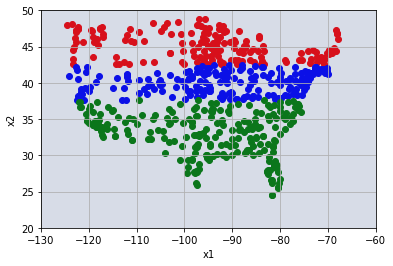

In [47]:
df = pd.read_csv("myENGR_518_Solar_energy_datasets.csv")
x=df.iloc[:, 4:6]
y=df.iloc[:,9]
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, train_size=600, random_state=None)
x1=x_train.iloc[:, 1]#  Longitude
x2=x_train.iloc[:, 0]#Latitude
colors=('r','b', 'g')
plt.scatter(x1[y==0],x2[y==0],c=colors[0])
plt.scatter(x1[y==1],x2[y==1],c=colors[1])
plt.scatter(x1[y==2],x2[y==2],c=colors[2]) 
plt.grid(1)
plt.ylabel('Latitude')
plt.xlabel('Longitude')
x_train=x_train.T
y_train=y_train.to_frame()
y_train=y_train.T
x_train=x_train.values
y_train=y_train.values
print(x_train.shape, y_train.shape,type(y_train))

# import auto diff
from autograd import grad
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd.misc.flatten import flatten_func
from autograd import value_and_grad

# compute C linear combinations, one per classifier
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T
# multiclass perceptron
lam = 10**-21 # reg param
# categorical cross entropy cost function
def categoricalcrossentropy(x,y,w):
    # pre-compute predictions on all points
    all_evals = model(x,w)
    
    a = np.exp(all_evals).sum(axis = 0)
    b = all_evals[y.astype(int),np.arange(np.size(y))]
    cost = -np.sum(np.log(b/a))
    
    # return average
    return cost/float(np.size(y))
# gradient descent function
def gradient_descent(g, step, max_its, w):
     # flatten g
    g_flat, unflatten_func, w_flat = flatten_func(g,w)
    # compute gradient
    gradient = grad(g_flat)
    # gradient descent loop
    weight_history = [w_flat] # weight history container
    cost_history = [g_flat(w_flat)] # cost history container
    for k in range(max_its):
    # eval gradient
        grad_eval = gradient(w_flat)
        grad_eval_norm = grad_eval / np.linalg.norm(grad_eval)
        # take grad descent step
        if step == 'd':
            alpha = 1/(k+1)
        else:
            alpha = step
        w_flat = w_flat - alpha*grad_eval_norm
        # record weight and cost
        weight_history.append(w_flat)
        cost_history.append(g_flat(w_flat))
    return weight_history, cost_history, unflatten_func
Pc = 20 # points per class
C = 3 # n. classes
iter = 500
N = 2

w = np.ones((N+1,C))
def c(t):
    c = categoricalcrossentropy(x_train,y_train,t)
    return c
a, b, unflatten = gradient_descent(c,'d',iter,w)
plt.figure(0)
# plt.plot(b)
wp = unflatten(a[iter])
xp1, xp2 = np.meshgrid(np.linspace(-130,-60,100),np.linspace(20,50,100))
# vectorize mesh grid
xp1_v = xp1.reshape(-1,1)
xp2_v = xp2.reshape(-1,1)
Xp_data = np.append(xp1_v,xp2_v,axis=1)
v=model(Xp_data.T,wp)
z=np.argmax(v,axis=0)
z=z.reshape(xp1.shape)
plt.figure(1)
plt.contourf(xp1,xp2,z,alpha=.2)
plt.xlabel('x1')
plt.ylabel('x2');